<h3>For this notebook we are using the dataset available from kaggle</h3>
https://www.kaggle.com/roopahegde/cryptocurrency-timeseries-2020?select=gemini_LTCUSD_2020_1min.csv

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers

In [41]:
# importing data from csv file setting the index column as date

crypto_data = pd.read_csv('dataset/gemini_BTCUSD_2020_1min.csv',parse_dates=["Date"], index_col="Date")
crypto_data.head()

Unix Timestamp  Symbol      Open      High       Low  \
Date                                                                        
2021-04-20 00:02:00    1.618880e+12  BTCUSD  55717.47  55723.00  55541.69   
2021-04-20 00:01:00    1.618880e+12  BTCUSD  55768.94  55849.82  55711.74   
2021-04-20 00:00:00    1.618880e+12  BTCUSD  55691.79  55793.15  55691.79   
2021-04-19 23:59:00    1.618880e+12  BTCUSD  55777.86  55777.86  55677.92   
2021-04-19 23:58:00    1.618880e+12  BTCUSD  55803.50  55823.88  55773.08   

                        Close    Volume  
Date                                     
2021-04-20 00:02:00  55541.69  2.406734  
2021-04-20 00:01:00  55717.47  0.573458  
2021-04-20 00:00:00  55768.94  3.309904  
2021-04-19 23:59:00  55691.79  0.684934  
2021-04-19 23:58:00  55777.86  0.477225

In [2]:
# our dataset has total of 658065 rows and 7 column

crypto_data.shape

(658065, 7)

In [44]:
# names of all the column

columns = crypto_data.columns
columns

Index(['Unix Timestamp', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [4]:
# to check if we have multiple cryptocurrency in our dataset 

list_of_crypto = crypto_data['Symbol'].unique()
print('Total number of cryptos we have are: ',len(list_of_crypto))

Total number of cryptos we have are:  1


In [6]:
# selecting 'Open' feature to predict
# change the 'Open' feature to 'High' 'Low' 'Close' 'Volume' based on application

btc_data = crypto_data[['Open']]
print('shape of bitcoin data :', btc_data.shape)
btc_data.head()

shape of bitcoin data : (658065, 1)


Open
Date                         
2021-04-20 00:02:00  55717.47
2021-04-20 00:01:00  55768.94
2021-04-20 00:00:00  55691.79
2021-04-19 23:59:00  55777.86
2021-04-19 23:58:00  55803.50

Text(0.5, 1.0, 'Bitcoin graph')

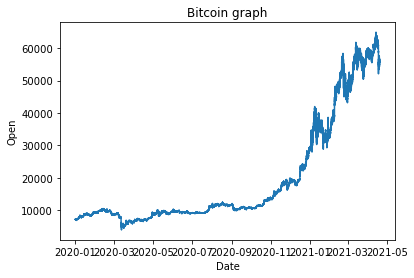

In [7]:
# plotting the the btc_data
# x = index
# y = Open price

plt.plot(btc_data.index,btc_data.Open)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Bitcoin graph')

## Input for lstms
* LSTM requires the input to be a 3D tensor with shape (batch_size, timesteps, input_dim).
* Timesteps = 90, Taking past 90 values
* We are using only 'open' feature to predict so input_dim = 1

<p>We will use a series of 90 days to predict a data given at time t</p>

In [8]:
# history stores with 90 data per batch
# target stores corresponding output to be predicted
data = btc_data.iloc[:, 0]
history = []
target = []

# nuumber of data to store in history
length = 90 

# splitting the btc_data to history and target
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    history.append(x)
    target.append(y)

In [49]:
print('Number of rows in history : ',len(history))
print('Number of rows in target : ',len(target))

Number of rows in history :  657975
Number of rows in target :  657975


In [11]:
# diplaying split
print(history[1][89])
print(data[90])
print(target[0])

56192.26
56192.26
56192.26


In [12]:
# converting data to numpy array
history = np.array(history)
target = np.array(target)

# reshaping target data
target = target.reshape(-1,1)
print(target)

[[56192.26]
 [56215.4 ]
 [56155.41]
 ...
 [ 7163.3 ]
 [ 7163.3 ]
 [ 7165.9 ]]


In [13]:
# to scale our data before inputing to the model
scaler = MinMaxScaler()
history_scaled = scaler.fit_transform(history)
target_scaled = scaler.fit_transform(target)

In [14]:
# LSTM requires the input to be a 3D tensor with shape (batch_size, timesteps, input_dim).
history_scaled = history_scaled.reshape((len(history_scaled), length, 1))
print('Shape of history after reshaping : ',history_scaled.shape)

Shape of history after reshaping :  (657975, 90, 1)


In [15]:
# chnage the split_percentage for training and test dataset
split_percentage = 90
train_test_split = int(split_percentage/100 * history_scaled.shape[0])
train_test_split

592177

In [31]:
# creating input data with the split size
X_train = history_scaled[:train_test_split,:,:]
X_test = history_scaled[train_test_split:,:,:]

# creating output data with split size
y_train = target_scaled[:train_test_split,:]
y_test = target_scaled[train_test_split:,:]

In [32]:
# shape of our train and test data
X_train.shape,X_test.shape

((592177, 90, 1), (65798, 90, 1))

In [33]:
# defining model
model = tf.keras.Sequential()
model.add(layers.LSTM(units = 32, activation = 'relu', return_sequences = True,input_shape = (90,1), dropout = 0.2))
model.add(layers.LSTM(units = 32, activation = 'relu', return_sequences = True, dropout = 0.2))
model.add(layers.LSTM(units = 32, activation = 'relu', dropout = 0.2))
model.add(layers.Dense(units=1))

# printing output summary
model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 90, 32)            4352      
_________________________________________________________________
lstm_13 (LSTM)               (None, 90, 32)            8320      
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [34]:
# compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
# train mode
history_model = model.fit(X_train, y_train, epochs=3, batch_size=64)

Epoch 1/3
9253/9253 [==============================] - 471s 50ms/step - loss: 2.6099e-04
Epoch 2/3
9253/9253 [==============================] - 453s 49ms/step - loss: 5.6139e-05
Epoch 3/3
9253/9253 [==============================] - 546s 59ms/step - loss: 3.9654e-05


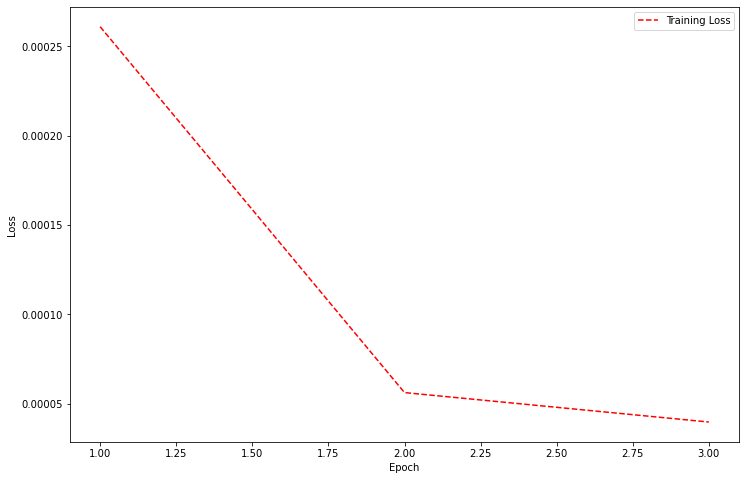

In [36]:
# printing model loss
loss = history_model.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [37]:
# predict model output using test data
pred = model.predict(X_test)

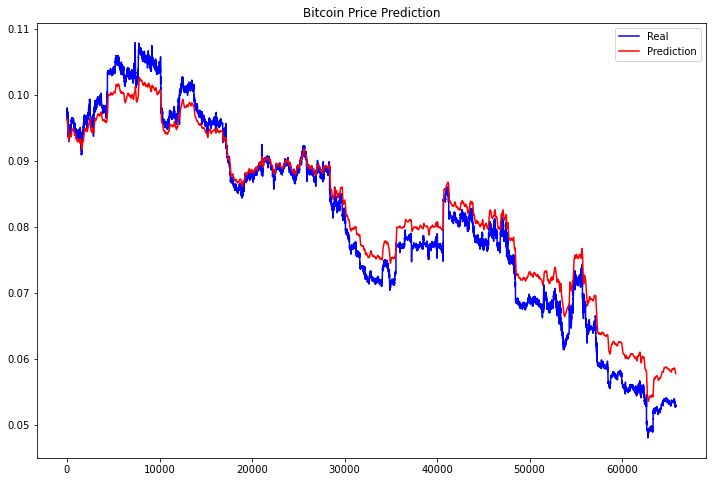

In [38]:
# plotting model prediction 
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()